In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Importing Dataset

df = pd.read_csv("Occupancy_Estimation.csv")

# Exploring Dataset

In [24]:
df

Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0      2017-12-22  10:49:41    24.94    24.75    24.56    25.38     121.0   
1      2017-12-22  10:50:12    24.94    24.75    24.56    25.44     121.0   
2      2017-12-22  10:50:42    25.00    24.75    24.50    25.44     121.0   
3      2017-12-22  10:51:13    25.00    24.75    24.56    25.44     121.0   
4      2017-12-22  10:51:44    25.00    24.75    24.56    25.44     121.0   
...           ...       ...      ...      ...      ...      ...       ...   
10124  2018-01-11   8:58:07    25.06    25.13    24.69    25.31       6.0   
10125  2018-01-11   8:58:37    25.06    25.06    24.69    25.25       6.0   
10126  2018-01-11   8:59:08    25.13    25.06    24.69    25.25       6.0   
10127  2018-01-11   8:59:39    25.13    25.06    24.69    25.25       6.0   
10128  2018-01-11   9:00:09    25.13    25.06    24.69    25.25       6.0   

       S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0          34.0      53.0      40.0      0.08      0.19      0.06      0.06   
1          33.0      53.0      40.0      0.93      0.05      0.06      0.06   
2          34.0      53.0      40.0      0.43      0.11      0.08      0.06   
3          34.0      53.0      40.0      0.41      0.10      0.10      0.09   
4          34.0      54.0      40.0      0.18      0.06      0.06      0.06   
...         ...       ...       ...       ...       ...       ...       ...   
10124       7.0      33.0      22.0      0.09      0.04      0.06      0.08   
10125       7.0      34.0      22.0      0.07      0.05      0.05      0.08   
10126       7.0      34.0      22.0      0.11      0.05      0.06      0.08   
10127       7.0      34.0      22.0      0.08      0.08      0.10      0.08   
10128       7.0      34.0      22.0      0.08      0.05      0.06      0.08   

       S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0       390.0      0.769231       0       0                     1  
1       390.0      0.646154       0       0                     1  
2       390.0      0.519231       0       0                     1  
3       390.0      0.388462       0       0                     1  
4       390.0      0.253846       0       0                     1  
...       ...           ...     ...     ...                   ...  
10124   345.0      0.000000       0       0                     0  
10125   345.0      0.000000       0       0                     0  
10126   345.0      0.000000       0       0                     0  
10127   345.0      0.000000       0       0                     0  
10128   345.0      0.000000       0       0                     0  

[10129 rows x 19 columns]

In [4]:
df.shape

(10129, 19)

In [5]:
df.describe()

S1_Temp       S2_Temp       S3_Temp       S4_Temp      S1_Light  \
count  10123.000000  10102.000000  10088.000000  10089.000000  10097.000000   
mean      25.453952     25.546013     25.054555     25.753068     25.484401   
std        0.351390      0.586600      0.426282      0.356264     51.039823   
min       24.940000     24.750000     24.440000     24.940000      0.000000   
25%       25.190000     25.190000     24.690000     25.440000      0.000000   
50%       25.380000     25.380000     24.940000     25.750000      0.000000   
75%       25.630000     25.630000     25.380000     26.000000     12.000000   
max       26.380000     29.000000     26.190000     26.560000    165.000000   

           S2_Light      S3_Light      S4_Light      S1_Sound      S2_Sound  \
count  10102.000000  10088.000000  10106.000000  10077.000000  10090.000000   
mean      25.855771     34.081582     13.180487      0.168270      0.119833   
std       67.044061     58.308135     19.552846      0.317005      0.266540   
min        0.000000      0.000000      0.000000      0.060000      0.040000   
25%        0.000000      0.000000      0.000000      0.070000      0.050000   
50%        0.000000      0.000000      0.000000      0.080000      0.050000   
75%       14.000000     49.000000     22.000000      0.080000      0.060000   
max      258.000000    280.000000     74.000000      3.880000      3.440000   

           S3_Sound      S4_Sound        S5_CO2  S5_CO2_Slope        S6_PIR  \
count  10105.000000  10108.000000  10127.000000  10118.000000  10129.000000   
mean       0.158236      0.103859    460.824035     -0.005420      0.090137   
std        0.414080      0.120779    199.953665      1.163510      0.286392   
min        0.040000      0.050000    345.000000     -6.296154      0.000000   
25%        0.060000      0.060000    355.000000     -0.046154      0.000000   
50%        0.060000      0.080000    360.000000      0.000000      0.000000   
75%        0.070000      0.100000    465.000000      0.000000      0.000000   
max        3.670000      3.400000   1270.000000      8.980769      1.000000   

             S7_PIR  Room_Occupancy_Count  
count  10129.000000          10129.000000  
mean       0.079574              0.398559  
std        0.270645              0.893633  
min        0.000000              0.000000  
25%        0.000000              0.000000  
50%        0.000000              0.000000  
75%        0.000000              0.000000  
max        1.000000              3.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10123 non-null  float64
 3   S2_Temp               10102 non-null  float64
 4   S3_Temp               10088 non-null  float64
 5   S4_Temp               10089 non-null  float64
 6   S1_Light              10097 non-null  float64
 7   S2_Light              10102 non-null  float64
 8   S3_Light              10088 non-null  float64
 9   S4_Light              10106 non-null  float64
 10  S1_Sound              10077 non-null  float64
 11  S2_Sound              10090 non-null  float64
 12  S3_Sound              10105 non-null  float64
 13  S4_Sound              10108 non-null  float64
 14  S5_CO2                10127 non-null  float64
 15  S5_CO2_Slope       

In [7]:
df.isnull().sum()

Date                     0
Time                     0
S1_Temp                  6
S2_Temp                 27
S3_Temp                 41
S4_Temp                 40
S1_Light                32
S2_Light                27
S3_Light                41
S4_Light                23
S1_Sound                52
S2_Sound                39
S3_Sound                24
S4_Sound                21
S5_CO2                   2
S5_CO2_Slope            11
S6_PIR                   0
S7_PIR                   0
Room_Occupancy_Count     0
dtype: int64

# Handling Missing values

#### Impute with mean values

In [8]:
for i in df[['S1_Temp','S2_Temp','S3_Temp','S4_Temp','S1_Light','S2_Light','S4_Light','S3_Light',
             'S1_Sound','S2_Sound','S3_Sound','S4_Sound','S5_CO2','S5_CO2_Slope']]:
    df[i]=df[i].fillna(df[i].mean())

In [9]:
df.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [10]:
df.head()

Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0  2017-12-22  10:49:41    24.94    24.75    24.56    25.38     121.0   
1  2017-12-22  10:50:12    24.94    24.75    24.56    25.44     121.0   
2  2017-12-22  10:50:42    25.00    24.75    24.50    25.44     121.0   
3  2017-12-22  10:51:13    25.00    24.75    24.56    25.44     121.0   
4  2017-12-22  10:51:44    25.00    24.75    24.56    25.44     121.0   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0      34.0      53.0      40.0      0.08      0.19      0.06      0.06   
1      33.0      53.0      40.0      0.93      0.05      0.06      0.06   
2      34.0      53.0      40.0      0.43      0.11      0.08      0.06   
3      34.0      53.0      40.0      0.41      0.10      0.10      0.09   
4      34.0      54.0      40.0      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0   390.0      0.769231       0       0                     1  
1   390.0      0.646154       0       0                     1  
2   390.0      0.519231       0       0                     1  
3   390.0      0.388462       0       0                     1  
4   390.0      0.253846       0       0                     1

In [18]:
df.corr()

S1_Temp   S2_Temp   S3_Temp   S4_Temp  S1_Light  \
S1_Temp               1.000000  0.814003  0.944463  0.853345  0.680356   
S2_Temp               0.814003  1.000000  0.776604  0.706957  0.643713   
S3_Temp               0.944463  0.776604  1.000000  0.879069  0.591691   
S4_Temp               0.853345  0.706957  0.879069  1.000000  0.581696   
S1_Light              0.680356  0.643713  0.591691  0.581696  1.000000   
S2_Light              0.545016  0.639615  0.495963  0.453188  0.836378   
S3_Light              0.643548  0.604133  0.634986  0.584962  0.814650   
S4_Light              0.208638  0.361241  0.290824  0.381852  0.504171   
S1_Sound              0.484440  0.480530  0.416046  0.397857  0.673238   
S2_Sound              0.464472  0.477765  0.409590  0.370198  0.630968   
S3_Sound              0.462502  0.438816  0.418626  0.358882  0.521057   
S4_Sound              0.435406  0.417569  0.401693  0.365186  0.537877   
S5_CO2                0.867373  0.753236  0.817280  0.648526  0.603190   
S5_CO2_Slope          0.147707  0.193228  0.109145  0.118277  0.507045   
S6_PIR                0.436145  0.475752  0.402079  0.339570  0.605704   
S7_PIR                0.474000  0.465502  0.457732  0.337701  0.543438   
Room_Occupancy_Count  0.700075  0.676109  0.649355  0.526676  0.847799   

                      S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  \
S1_Temp               0.545016  0.643548  0.208638  0.484440  0.464472   
S2_Temp               0.639615  0.604133  0.361241  0.480530  0.477765   
S3_Temp               0.495963  0.634986  0.290824  0.416046  0.409590   
S4_Temp               0.453188  0.584962  0.381852  0.397857  0.370198   
S1_Light              0.836378  0.814650  0.504171  0.673238  0.630968   
S2_Light              1.000000  0.697771  0.445624  0.560206  0.649171   
S3_Light              0.697771  1.000000  0.564331  0.558085  0.514948   
S4_Light              0.445624  0.564331  1.000000  0.327390  0.341807   
S1_Sound              0.560206  0.558085  0.327390  1.000000  0.676128   
S2_Sound              0.649171  0.514948  0.341807  0.676128  1.000000   
S3_Sound              0.458421  0.605866  0.175826  0.588189  0.605265   
S4_Sound              0.496003  0.566193  0.232124  0.646058  0.715183   
S5_CO2                0.561306  0.649112  0.144766  0.427916  0.402631   
S5_CO2_Slope          0.496032  0.461326  0.207047  0.374721  0.405899   
S6_PIR                0.552413  0.499764  0.321512  0.568719  0.558383   
S7_PIR                0.551697  0.576916  0.216159  0.504961  0.572157   
Room_Occupancy_Count  0.783851  0.793738  0.349692  0.636900  0.661860   

                      S3_Sound  S4_Sound    S5_CO2  S5_CO2_Slope    S6_PIR  \
S1_Temp               0.462502  0.435406  0.867373      0.147707  0.436145   
S2_Temp               0.438816  0.417569  0.753236      0.193228  0.475752   
S3_Temp               0.418626  0.401693  0.817280      0.109145  0.402079   
S4_Temp               0.358882  0.365186  0.648526      0.118277  0.339570   
S1_Light              0.521057  0.537877  0.603190      0.507045  0.605704   
S2_Light              0.458421  0.496003  0.561306      0.496032  0.552413   
S3_Light              0.605866  0.566193  0.649112      0.461326  0.499764   
S4_Light              0.175826  0.232124  0.144766      0.207047  0.321512   
S1_Sound              0.588189  0.646058  0.427916      0.374721  0.568719   
S2_Sound              0.605265  0.715183  0.402631      0.405899  0.558383   
S3_Sound              1.000000  0.789980  0.468152      0.333172  0.455423   
S4_Sound              0.789980  1.000000  0.388807      0.367727  0.464374   
S5_CO2                0.468152  0.388807  1.000000      0.076076  0.394926   
S5_CO2_Slope          0.333172  0.367727  0.076076      1.000000  0.372480   
S6_PIR                0.455423  0.464374  0.394926      0.372480  1.000000   
S7_PIR                0.556359  0.543830  0.473542      0.433604  0.571125   
Room_Occupancy_Count  0.561315 

# Data Visualization

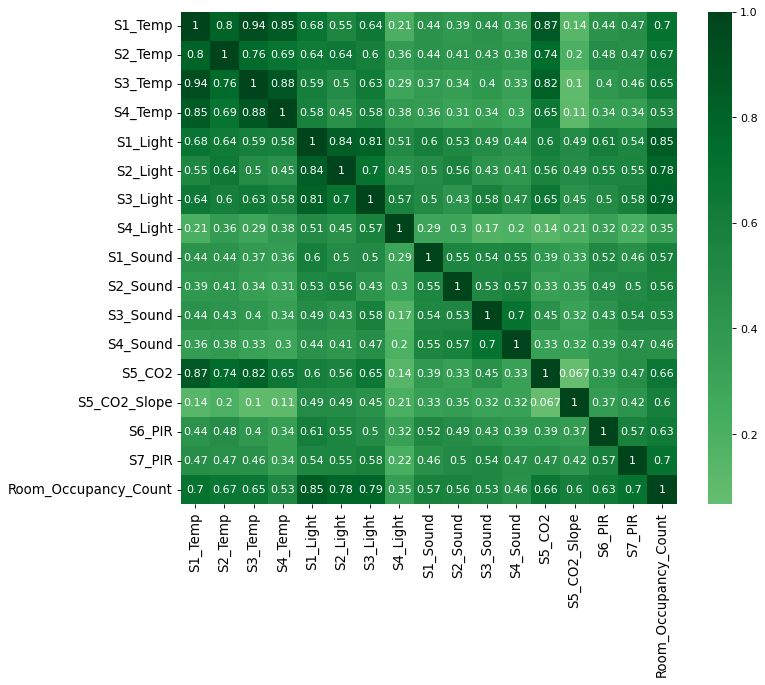

In [11]:
plt.figure(figsize=(10,8), dpi=80)
sns.heatmap(df.corr(), xticklabels = df.corr().columns, yticklabels = df.corr().columns, cmap = 'Greens', center=0, annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

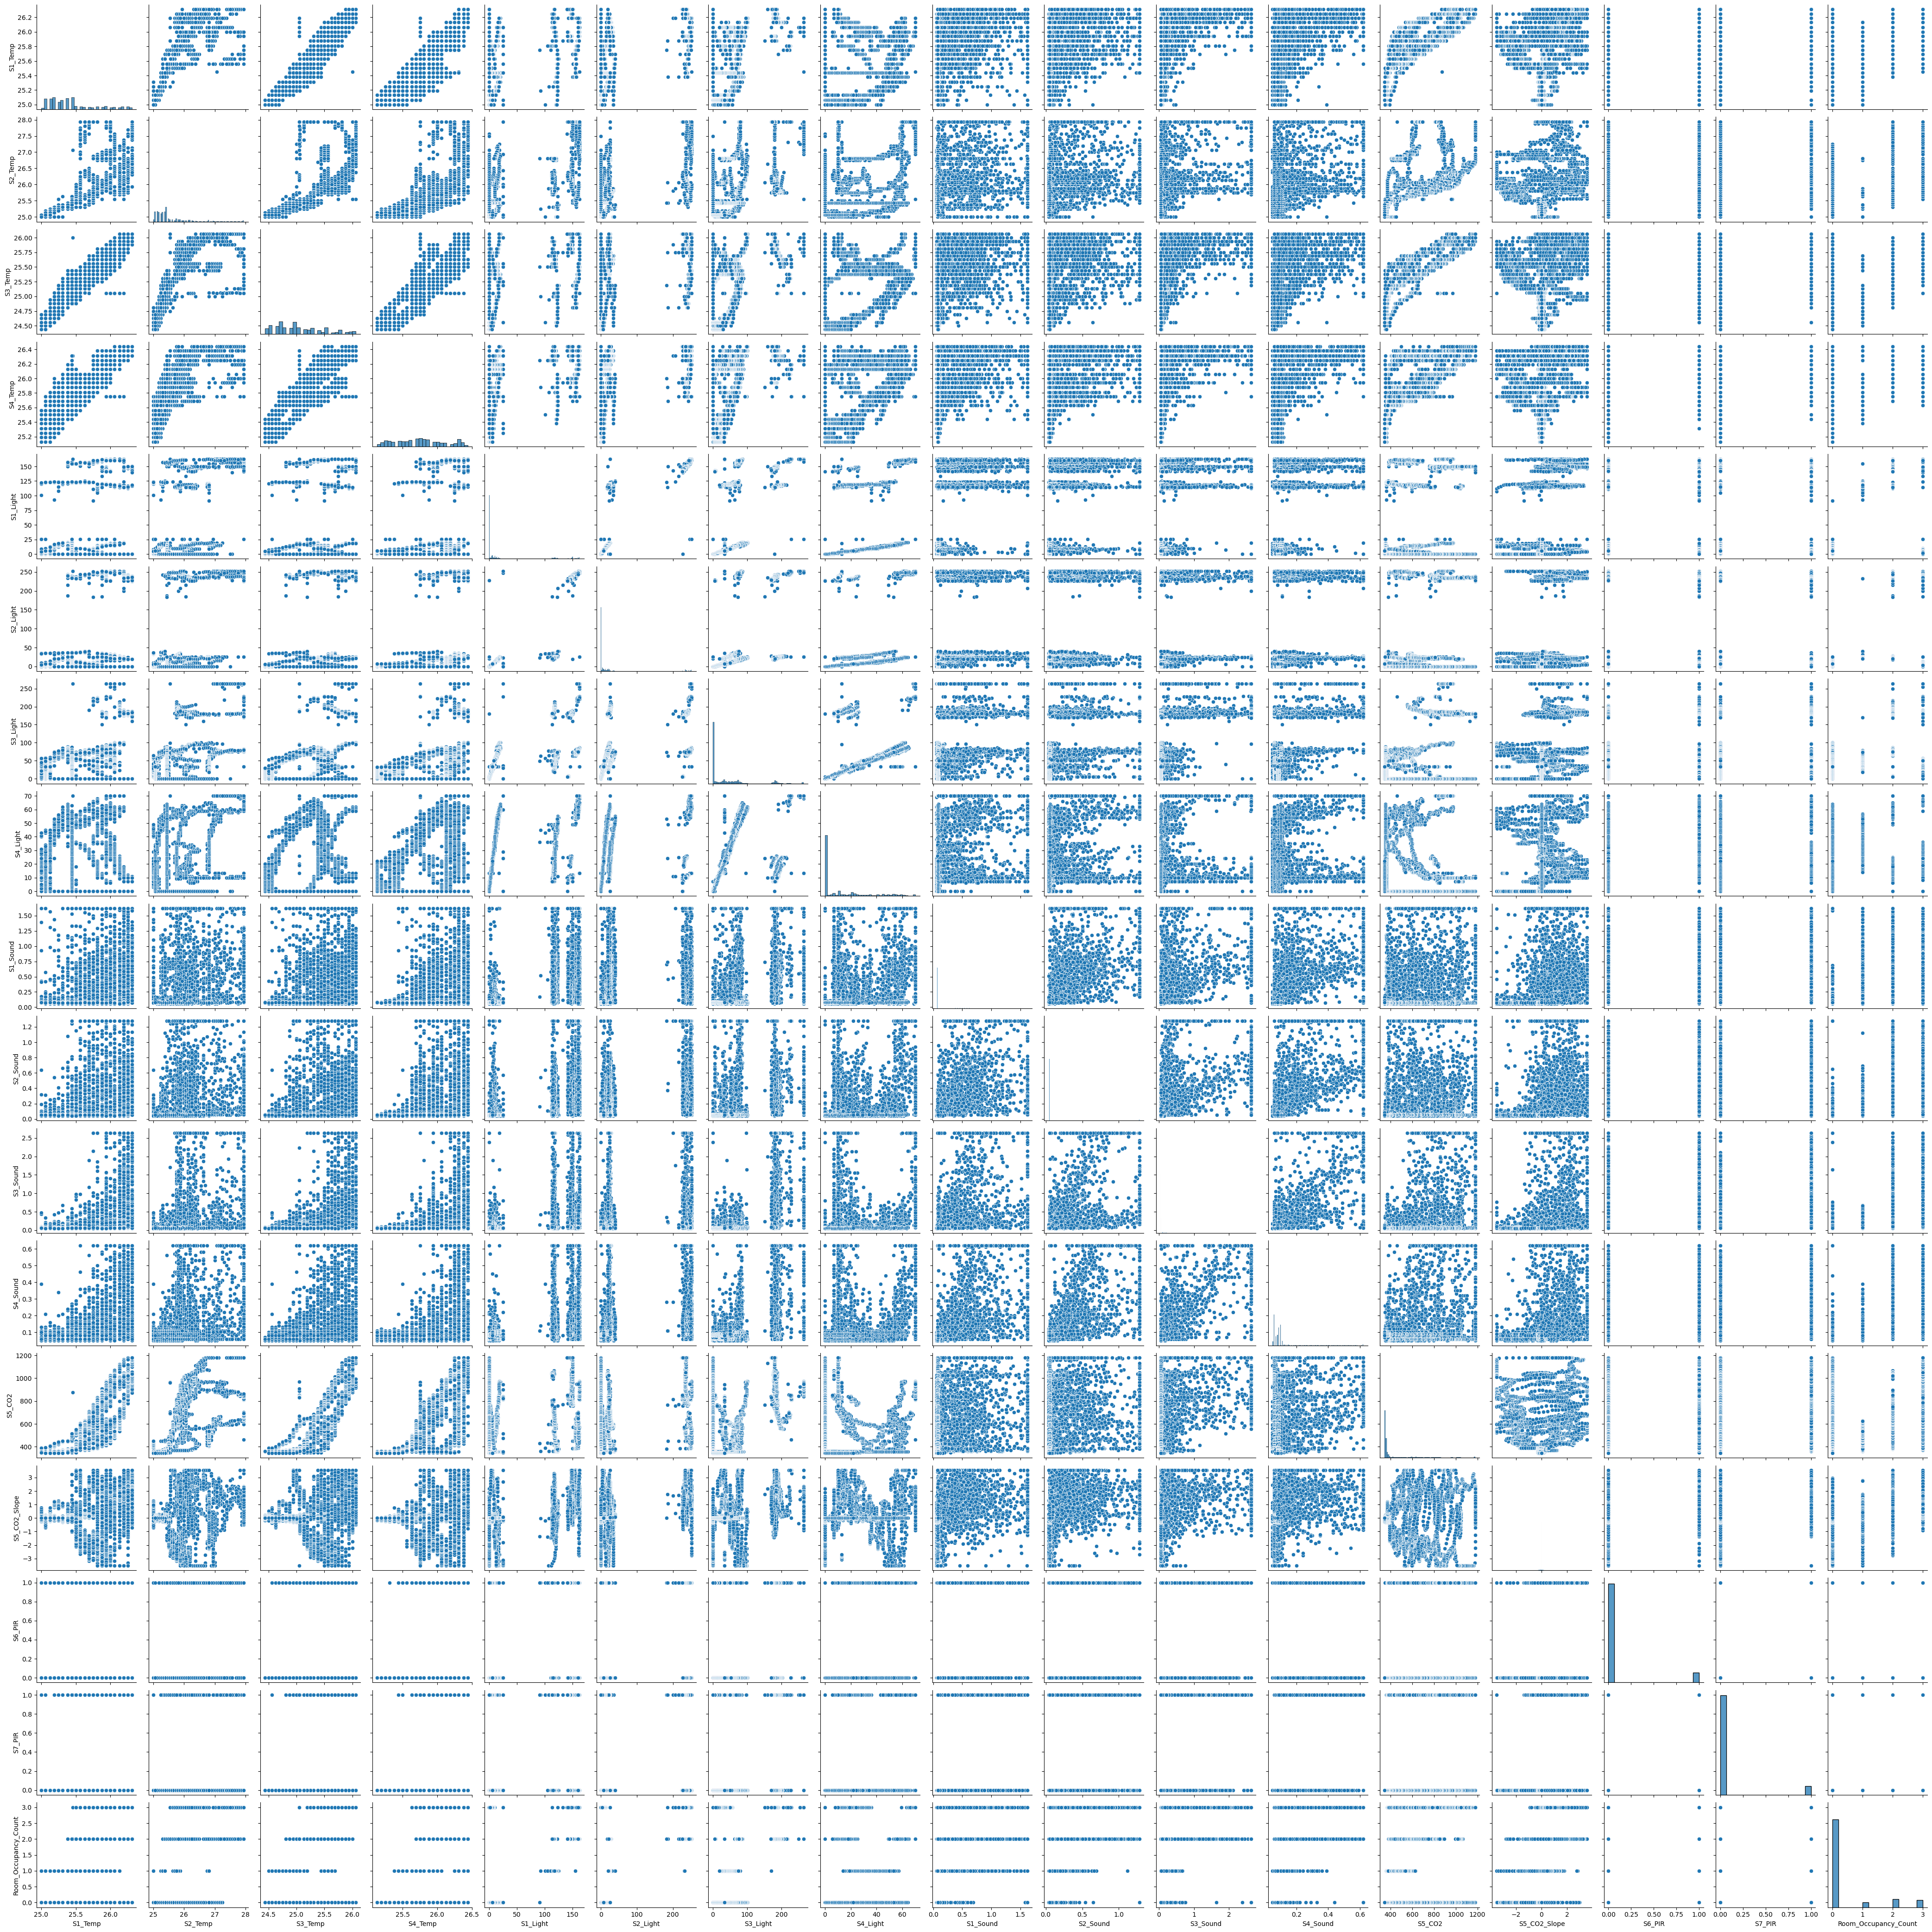

In [21]:
sns.pairplot(df)

### Feature Selection and Pruning

In [12]:
df = df.drop(labels = ['Date','Time'], axis=1)

In [13]:
df

S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  S2_Light  S3_Light  \
0        24.94    24.75    24.56    25.38     121.0      34.0      53.0   
1        24.94    24.75    24.56    25.44     121.0      33.0      53.0   
2        25.00    24.75    24.50    25.44     121.0      34.0      53.0   
3        25.00    24.75    24.56    25.44     121.0      34.0      53.0   
4        25.00    24.75    24.56    25.44     121.0      34.0      54.0   
...        ...      ...      ...      ...       ...       ...       ...   
10124    25.06    25.13    24.69    25.31       6.0       7.0      33.0   
10125    25.06    25.06    24.69    25.25       6.0       7.0      34.0   
10126    25.13    25.06    24.69    25.25       6.0       7.0      34.0   
10127    25.13    25.06    24.69    25.25       6.0       7.0      34.0   
10128    25.13    25.06    24.69    25.25       6.0       7.0      34.0   

       S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  S5_CO2  S5_CO2_Slope  \
0          40.0      0.08      0.19      0.06      0.06   390.0      0.769231   
1          40.0      0.93      0.05      0.06      0.06   390.0      0.646154   
2          40.0      0.43      0.11      0.08      0.06   390.0      0.519231   
3          40.0      0.41      0.10      0.10      0.09   390.0      0.388462   
4          40.0      0.18      0.06      0.06      0.06   390.0      0.253846   
...         ...       ...       ...       ...       ...     ...           ...   
10124      22.0      0.09      0.04      0.06      0.08   345.0      0.000000   
10125      22.0      0.07      0.05      0.05      0.08   345.0      0.000000   
10126      22.0      0.11      0.05      0.06      0.08   345.0      0.000000   
10127      22.0      0.08      0.08      0.10      0.08   345.0      0.000000   
10128      22.0      0.08      0.05      0.06      0.08   345.0      0.000000   

       S6_PIR  S7_PIR  Room_Occupancy_Count  
0           0       0                     1  
1           0       0                     1  
2           0       0                     1  
3           0       0                     1  
4           0       0                     1  
...       ...     ...                   ...  
10124       0       0                     0  
10125       0       0                     0  
10126       0       0                     0  
10127       0       0                     0  
10128       0       0                     0  

[10129 rows x 17 columns]

# Outlier Detection

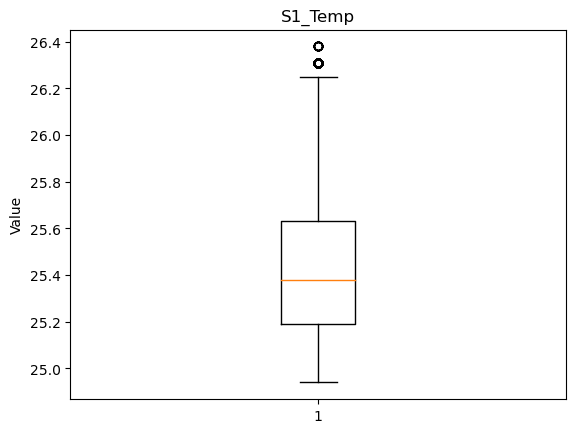

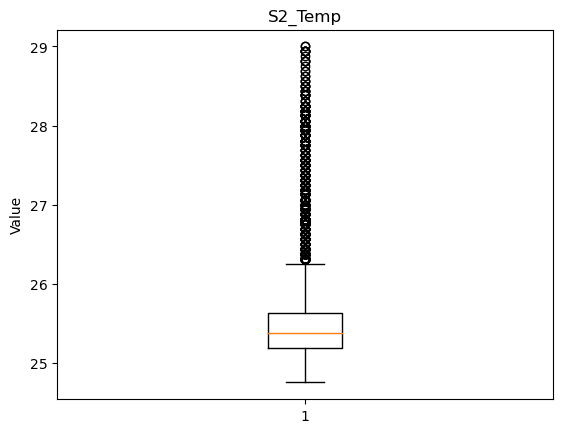

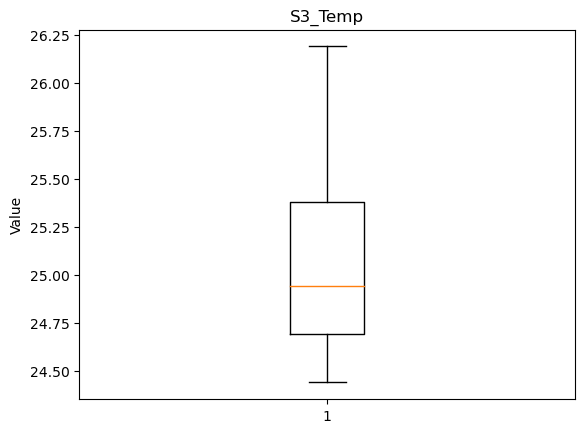

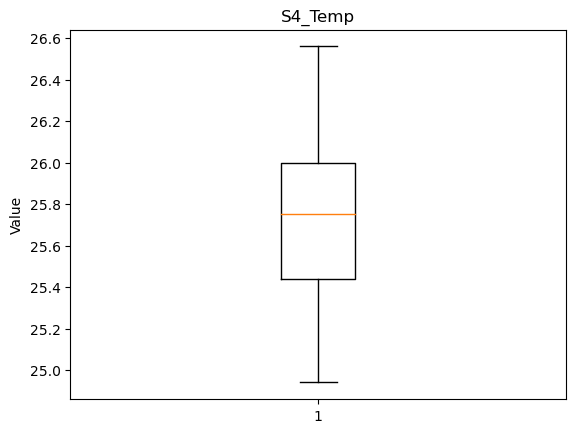

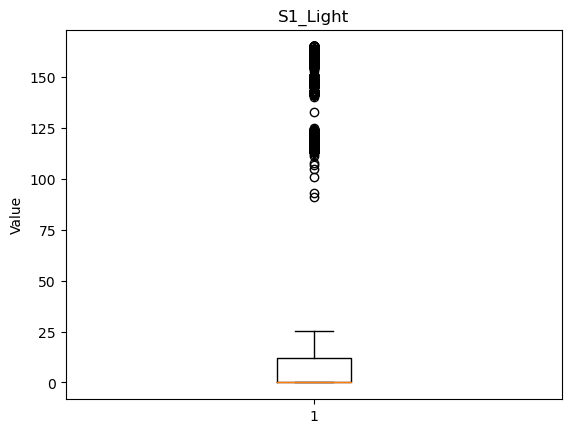

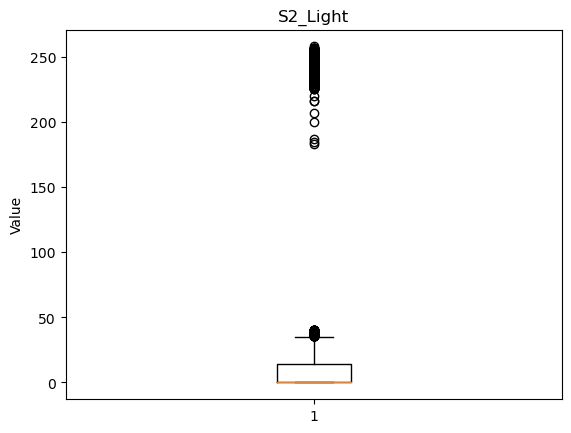

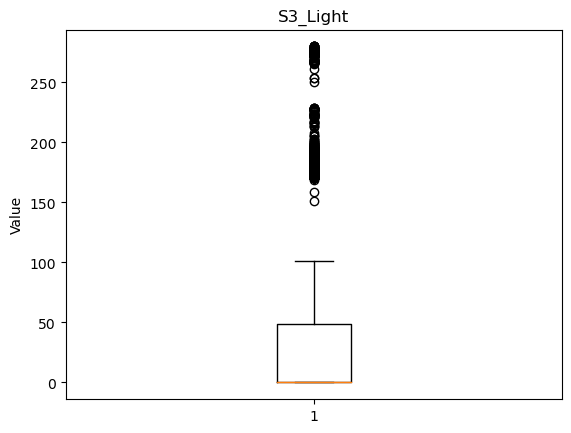

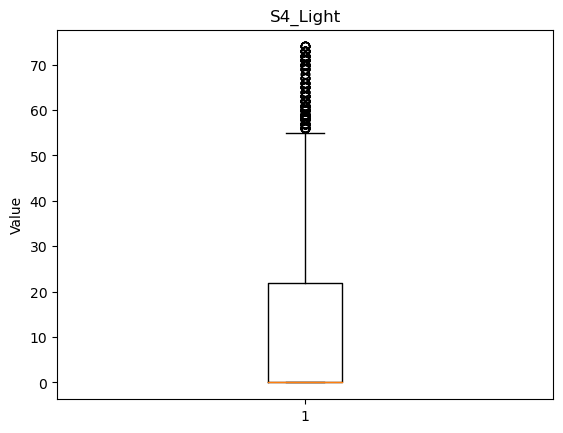

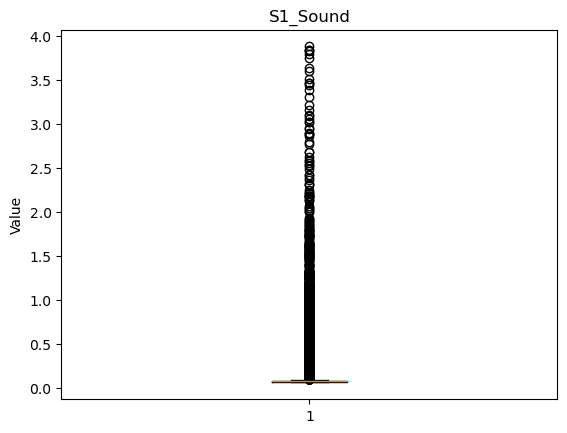

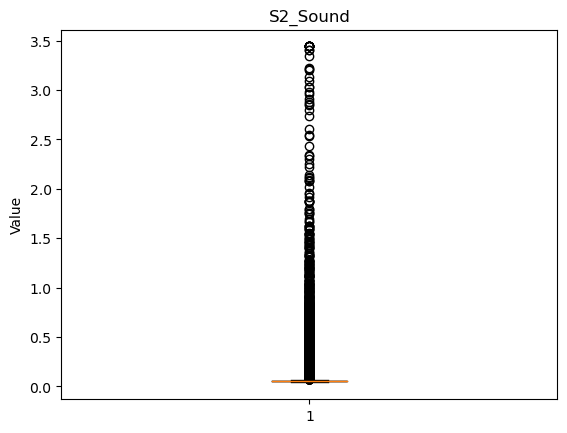

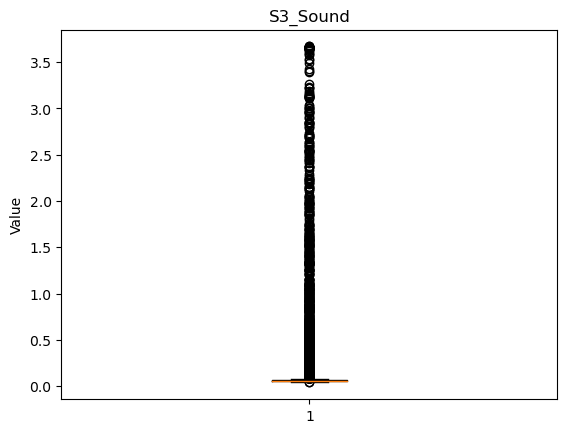

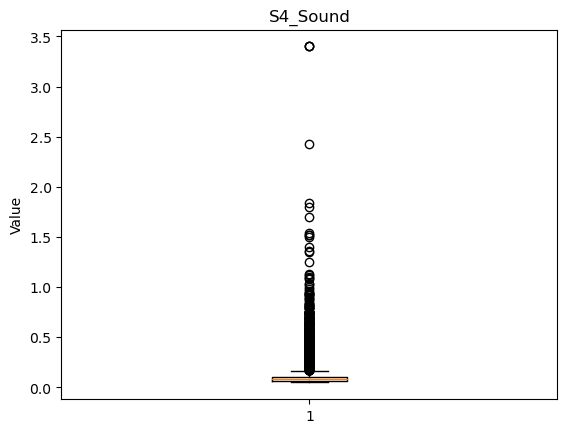

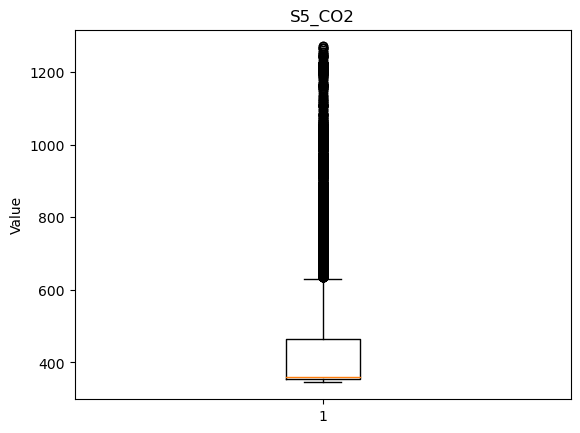

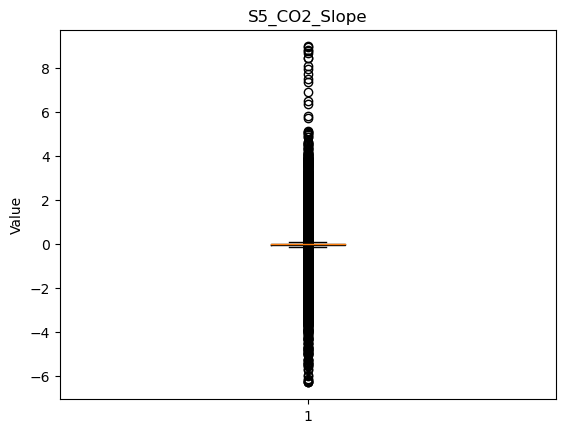

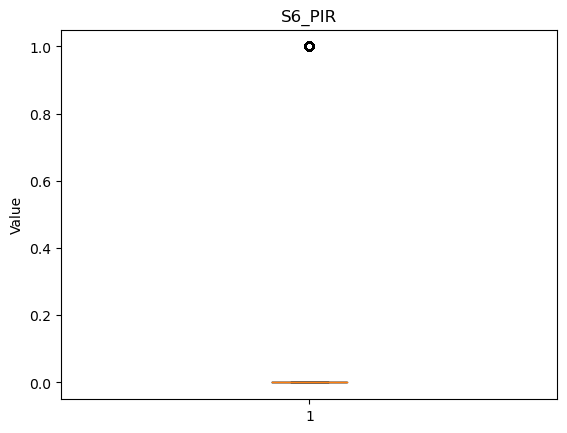

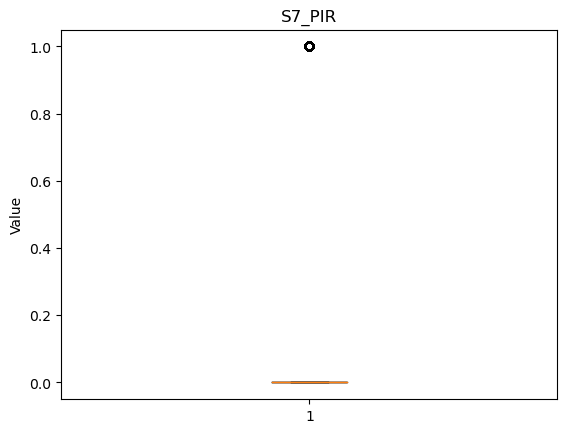

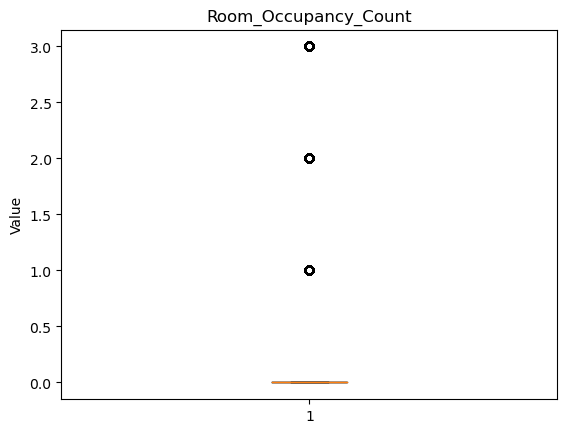

In [14]:
for i in df.columns:
    fig, ax = plt.subplots()
    ax.boxplot(df[i])
    ax.set_title(i)
    ax.set_ylabel('Value')
    plt.show()

# Outliers handling

In [16]:
for i in df:
    lb = df[i].quantile(0.01)
    ub = df[i].quantile(0.99)
    
    df[i] = np.where(df[i]<lb, lb, df[i])    
    df[i] = np.where(df[i]>ub, ub, df[i])

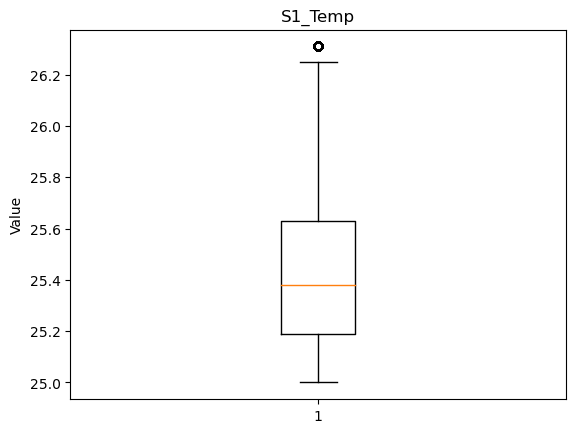

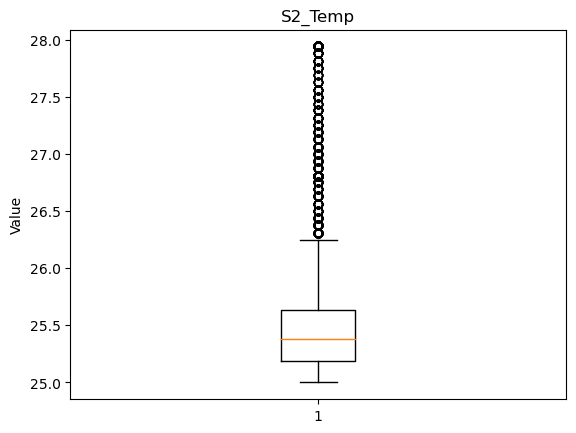

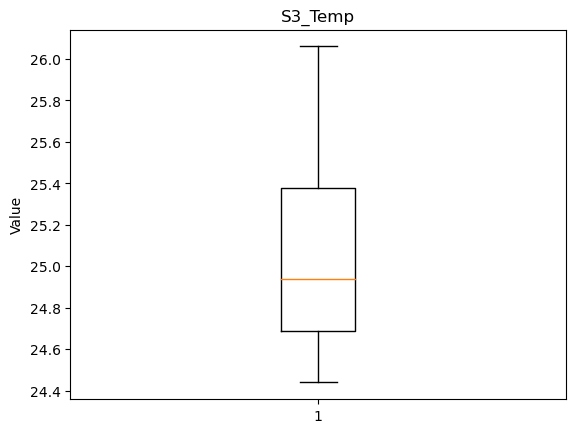

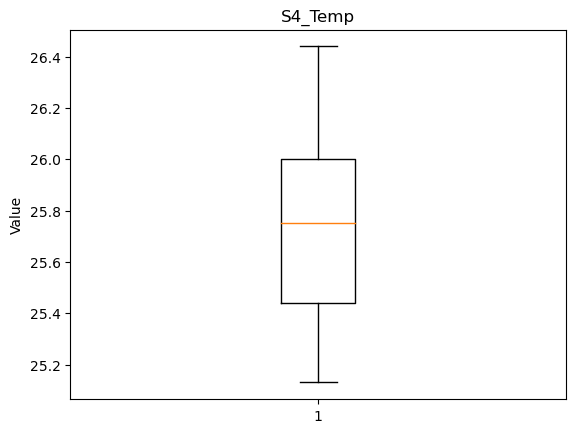

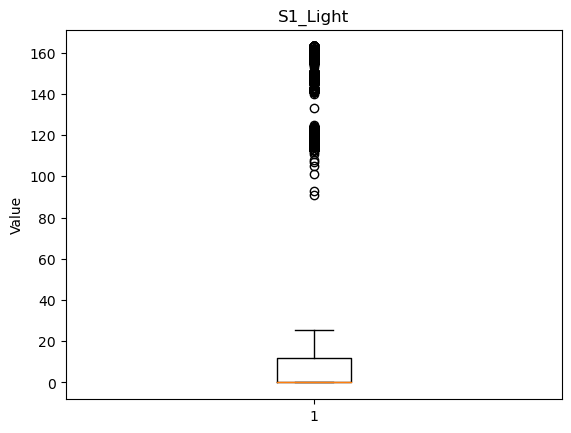

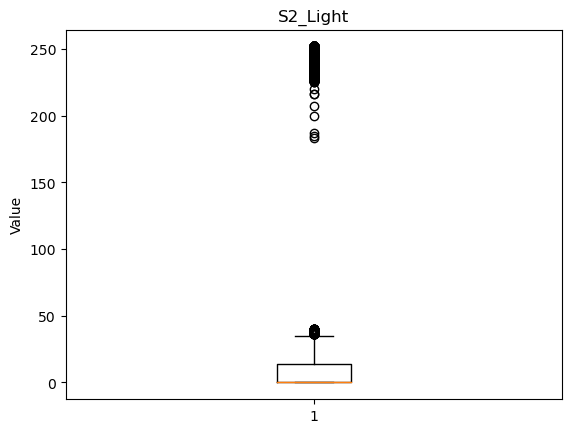

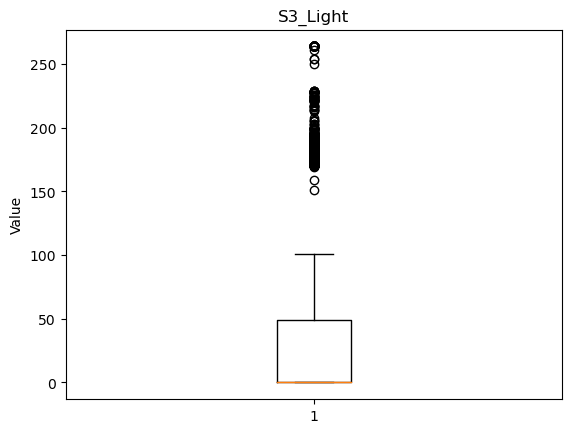

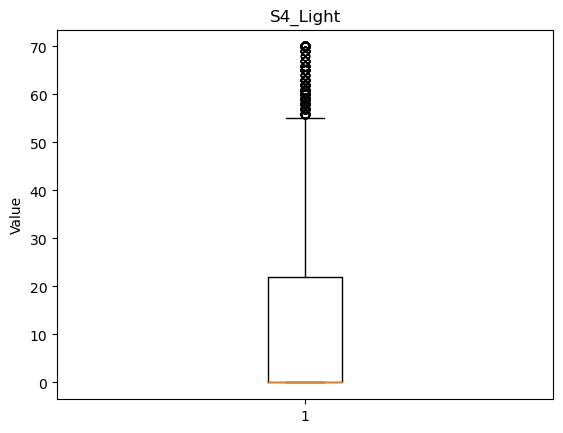

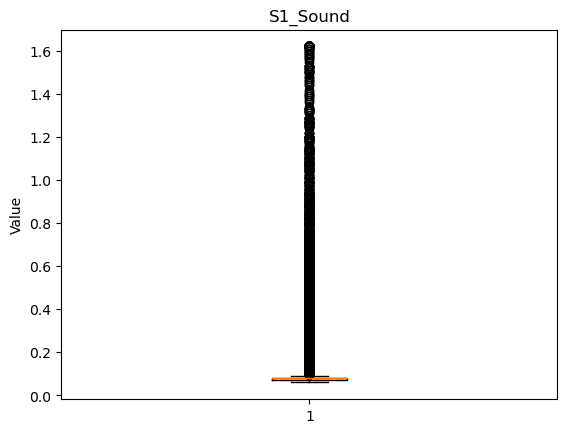

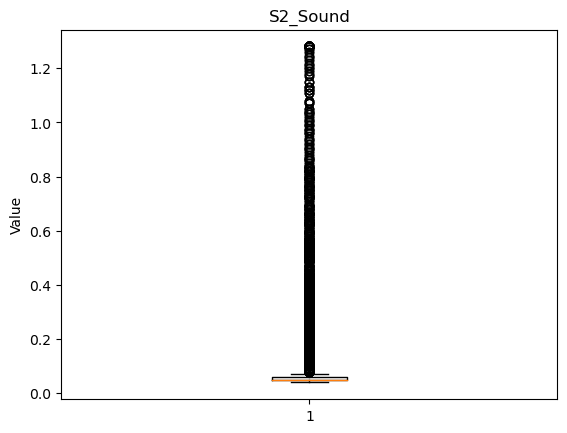

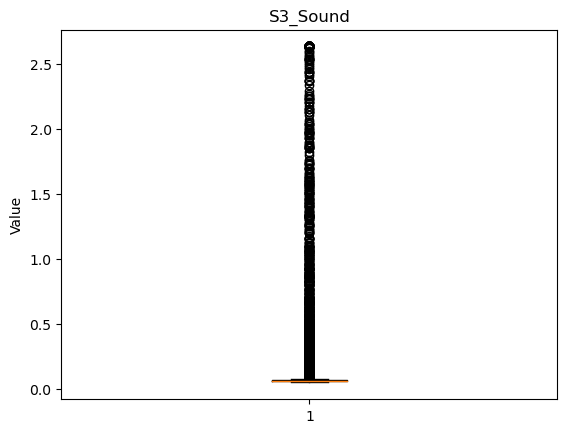

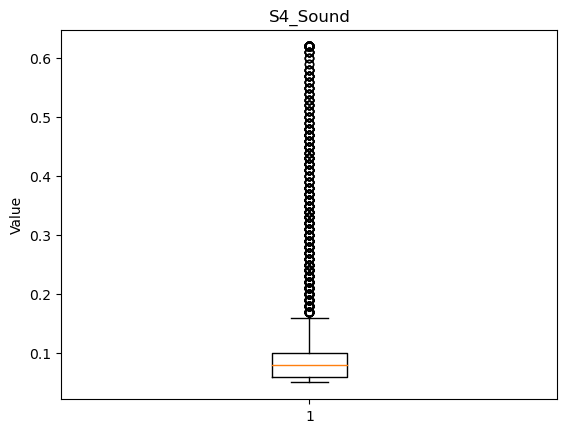

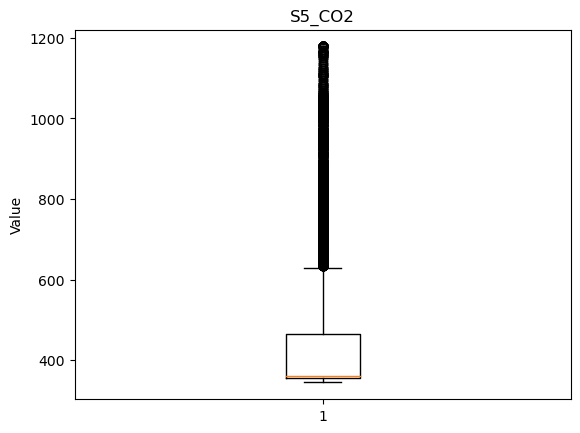

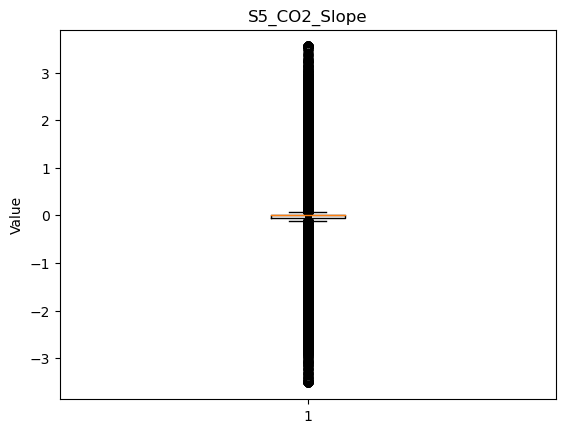

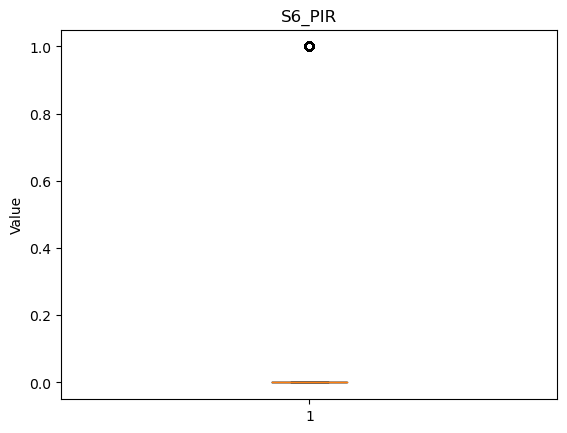

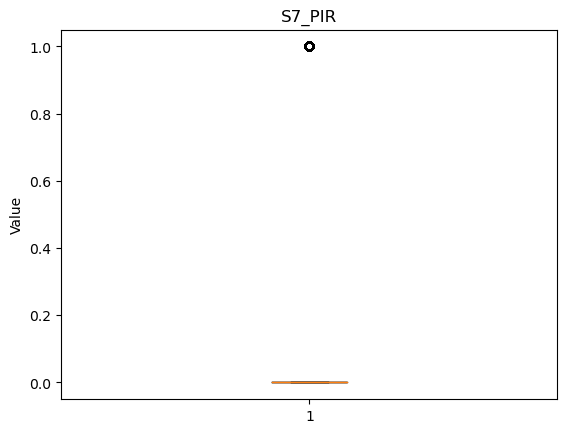

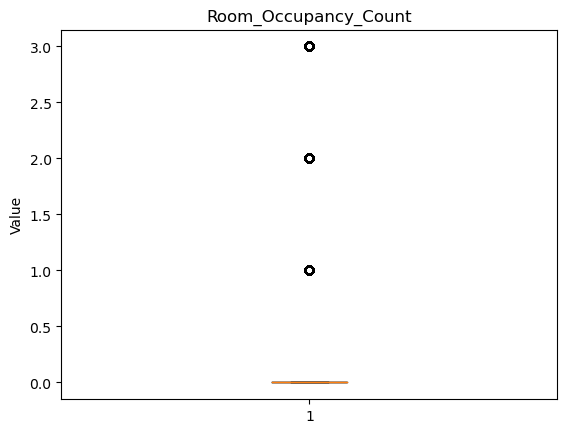

In [17]:
for i in df.columns:
    fig, ax = plt.subplots()
    ax.boxplot(df[i])
    ax.set_title(i)
    ax.set_ylabel('Value')
    plt.show()

### Spliting Data

In [19]:
X = df.drop('Room_Occupancy_Count', axis = 1)

In [20]:
X

S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  S2_Light  S3_Light  \
0        25.00    25.00    24.56    25.38     121.0      34.0      53.0   
1        25.00    25.00    24.56    25.44     121.0      33.0      53.0   
2        25.00    25.00    24.50    25.44     121.0      34.0      53.0   
3        25.00    25.00    24.56    25.44     121.0      34.0      53.0   
4        25.00    25.00    24.56    25.44     121.0      34.0      54.0   
...        ...      ...      ...      ...       ...       ...       ...   
10124    25.06    25.13    24.69    25.31       6.0       7.0      33.0   
10125    25.06    25.06    24.69    25.25       6.0       7.0      34.0   
10126    25.13    25.06    24.69    25.25       6.0       7.0      34.0   
10127    25.13    25.06    24.69    25.25       6.0       7.0      34.0   
10128    25.13    25.06    24.69    25.25       6.0       7.0      34.0   

       S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  S5_CO2  S5_CO2_Slope  \
0          40.0      0.08      0.19      0.06      0.06   390.0      0.769231   
1          40.0      0.93      0.05      0.06      0.06   390.0      0.646154   
2          40.0      0.43      0.11      0.08      0.06   390.0      0.519231   
3          40.0      0.41      0.10      0.10      0.09   390.0      0.388462   
4          40.0      0.18      0.06      0.06      0.06   390.0      0.253846   
...         ...       ...       ...       ...       ...     ...           ...   
10124      22.0      0.09      0.04      0.06      0.08   345.0      0.000000   
10125      22.0      0.07      0.05      0.05      0.08   345.0      0.000000   
10126      22.0      0.11      0.05      0.06      0.08   345.0      0.000000   
10127      22.0      0.08      0.08      0.10      0.08   345.0      0.000000   
10128      22.0      0.08      0.05      0.06      0.08   345.0      0.000000   

       S6_PIR  S7_PIR  
0         0.0     0.0  
1         0.0     0.0  
2         0.0     0.0  
3         0.0     0.0  
4         0.0     0.0  
...       ...     ...  
10124     0.0     0.0  
10125     0.0     0.0  
10126     0.0     0.0  
10127     0.0     0.0  
10128     0.0     0.0  

[10129 rows x 16 columns]

In [21]:
y = df[['Room_Occupancy_Count']]
y

Room_Occupancy_Count
0                       1.0
1                       1.0
2                       1.0
3                       1.0
4                       1.0
...                     ...
10124                   0.0
10125                   0.0
10126                   0.0
10127                   0.0
10128                   0.0

[10129 rows x 1 columns]

In [22]:
X.shape

(10129, 16)

In [23]:
y.shape

(10129, 1)

In [24]:
X.shape[0]

10129

In [25]:
y.shape[0]

10129

### Random spliting in train and test data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

### ML Algorithm

In [27]:
clf = svm.SVC()

In [28]:
clf.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [29]:
y_pred = clf.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score", accuracy)

Accuracy Score 0.9726883843369529


In [31]:
cm = confusion_matrix(y_test, y_pred,labels=[0,1])

cm

array([[2449,    1],
       [   0,  147]], dtype=int64)

In [32]:
cr = classification_report(y_test, y_pred)

In [33]:
print("Classification Report: \n", cr)

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2450
         1.0       0.99      0.99      0.99       148
         2.0       0.97      0.89      0.93       240
         3.0       0.85      0.73      0.78       201

    accuracy                           0.97      3039
   macro avg       0.95      0.90      0.92      3039
weighted avg       0.97      0.97      0.97      3039



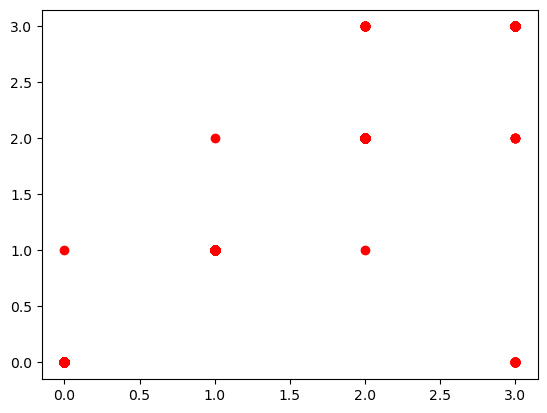

In [34]:
plt.plot(y_test, y_pred,'ro')

In [35]:
y_pred = y_pred.reshape(len(y_test), 1)

In [36]:
y_test.shape

(3039, 1)

In [37]:
import pandas as pd
df = pd.DataFrame(y_pred)
df['index'] = df.index
#df['name'] = df['0']

df.rename(columns={'0': 'Col_1'})

0  index
0     0.0      0
1     0.0      1
2     0.0      2
3     0.0      3
4     2.0      4
...   ...    ...
3034  0.0   3034
3035  0.0   3035
3036  0.0   3036
3037  0.0   3037
3038  0.0   3038

[3039 rows x 2 columns]